### <b>MIDTERM REVIEW</b>

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info.operators import Operator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

<b>Problem 1.</b> Consider the following quantum circuit:

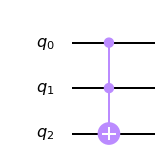

In [25]:
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

(a) What are the outputs for |001> and |101> ? 

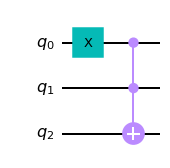

In [2]:
#output for |001>
q= QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.ccx(q[0], q[1], q[2])
qc.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


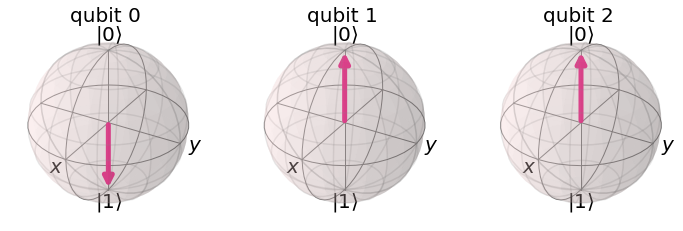

In [3]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

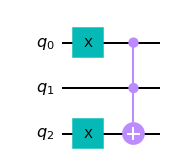

In [4]:
#output for |101>
q= QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.draw()

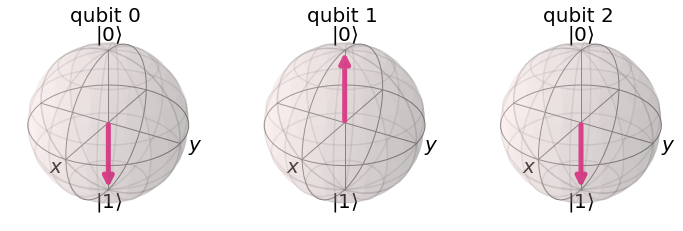

In [5]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

(b) What does this circuit do according to the inputs?

In [ ]:
If q[0] and q[1] are equal to 1, this program (circuit) will invert q[2].


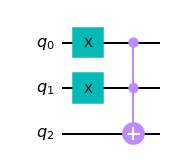

In [6]:
q= QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.draw()

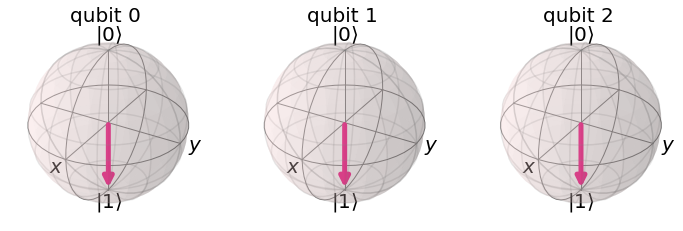

In [7]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

<b>Problem 2.</b> The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

In [8]:
op = Operator([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0], 
               [0, 0, 0, 1]])
op.label='op'
op

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

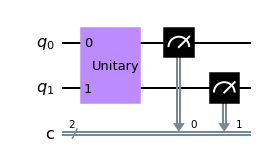

In [9]:
qb = QuantumRegister(2, name='q')
cb = ClassicalRegister(2, name='c')
circ = QuantumCircuit(qb, cb)
circ.append(op, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

Rewrite the following circuit, using the Operator class instead of Hadamard and NOT gates. 

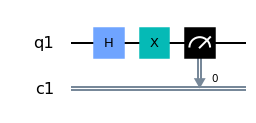

In [20]:
qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)
circ.h(qb[0])
circ.x(qb[0])
circ.measure([0],[0])
circ.draw('mpl')

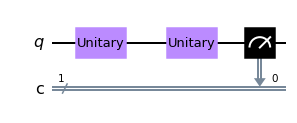

In [10]:
import math

qb = QuantumRegister(1, name='q')
cb = ClassicalRegister(1, name='c')
circ = QuantumCircuit(qb, cb)

hadG = Operator([[1/math.sqrt(2),1/math.sqrt(2)],
                [1/math.sqrt(2),-1/math.sqrt(2)]])

notG = Operator([[0,1],
                [1,0]])

circ.append(hadG, [0])
circ.append(notG, [0])

circ.measure([0],[0])
circ.draw('mpl')

<b>Problem 3.</b> 
Suppose you have a positive integer that is a power of two, represented in a 4-qubit system (|0010>, for instance). Implement the operations of multiplication and division by 2 efficiently, without using other arithmetic operations (addition, subtraction, multiplication and division).

In [ ]:
2 |0010> 2x2 = 4 = |0100> (shift left)
         2/2 = 1 = |0001> (shift right)
    

    |0010>
       i.   multiplication => swap(i,i+1)
            division.      => swap(i,i-1)

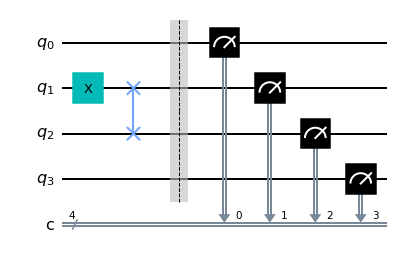

In [13]:

#multiplication

def multiply(i,circ):
    circ.swap(qb[i],qb[i+1])
    circ.barrier()
    circ.measure([0,1,2,3],[0,1,2,3])
    return circ


qb = QuantumRegister(4, name='q')
cb = ClassicalRegister(4, name='c')
qc = QuantumCircuit(qb, cb)
qc.x(qb[1])
qc=multiply(1,qc)
qc.draw()

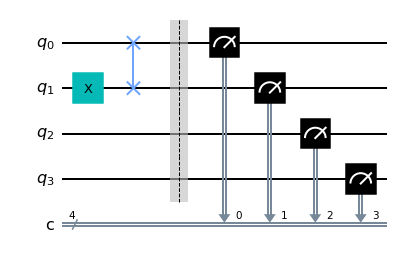

In [14]:
#division

def division(i,circ):
    circ.swap(qb[i],qb[i-1])
    circ.barrier()
    circ.measure([0,1,2,3],[0,1,2,3])
    return circ


qb = QuantumRegister(4, name='q')
cb = ClassicalRegister(4, name='c')
qc = QuantumCircuit(qb, cb)
qc.x(qb[1])
qc=division(1,qc)
qc.draw()

<b> Problem 4.</b> Consider the following implementation of the Quantum Fourier Transform:

/tmp/ipykernel_59/2525077700.py:10: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi/2**(n-qubit), qubit, n)


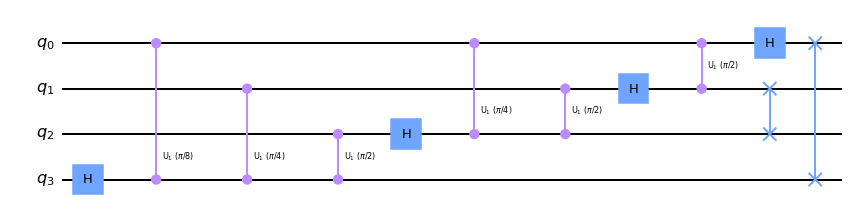

In [22]:
from math import pi

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

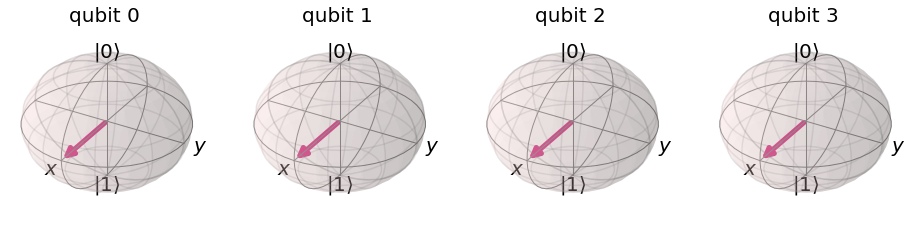

In [7]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

Implement the inverse of the Fourier Transform.

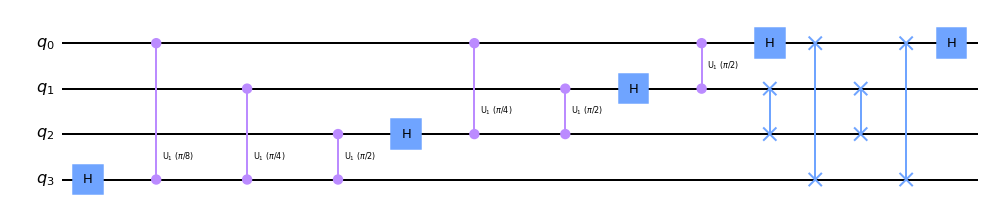

In [21]:
#First solution

qc.swap(0,3)
qc.swap(1,2)
qc.h(0)
qc.draw('mpl')

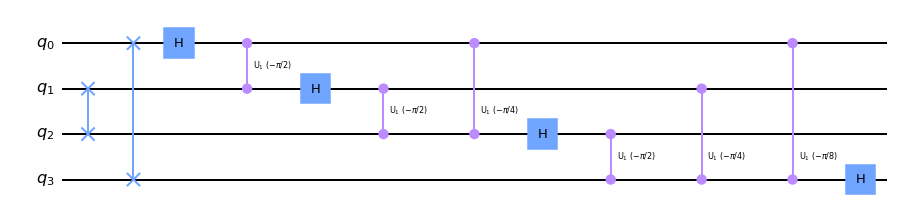

In [23]:
#SECOND SOLUTION
iqc=qc.inverse()
iqc.draw('mpl')